In [1]:
# ARC Simulation
from __future__ import division

from platform import python_version
print(python_version())

import math as mh
import argparse
import meep as mp
import time
import numpy as np
import matplotlib.pyplot as plt
from meep.materials import  cSi, SiO2, Si3N4
#from mayavi import mlab


3.9.7


ModuleNotFoundError: No module named 'meep'

In [33]:
sx=10
sy=10
rd = 0.5      #deepth of texture
eps_Si=12
eps_air=1
eps=4
T_Si=2
T_Arc=0.1
dpml = 1.0
cell = mp.Vector3(sx+2*dpml, sy+2*dpml, 0)
pml_layers = [mp.PML(dpml)]
resolution = 200
nfreq = 1000
fcen = 1.75  # pulse center frequency
df = 1.5  # pulse width (in frequency)

In [34]:
#geometry = [mp.Block(mp.Vector3(T_Si, sy, mp.inf), center=mp.Vector3(0, 0), material=mp.Medium(epsilon=eps_Si))]
geometry = [mp.Block(
                     size = mp.Vector3(sx, sy, mp.inf), 
                     center = mp.Vector3(0, 0), 
                     material=mp.Medium(epsilon=eps_air)
                     )
           ]

In [35]:
sources = [mp.Source(
                     mp.GaussianSource(fcen, fwidth=df), 
                     component=mp.Ez, 
                     center=mp.Vector3(-0.5*sx+1 , 0), 
                     size=mp.Vector3(0, sy)
                    )
          ]

-----------
Initializing structure...
time for choose_chunkdivision = 0.000750065 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 200
     block, center = (0,0,0)
          size (10,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 8.18122 s
-----------


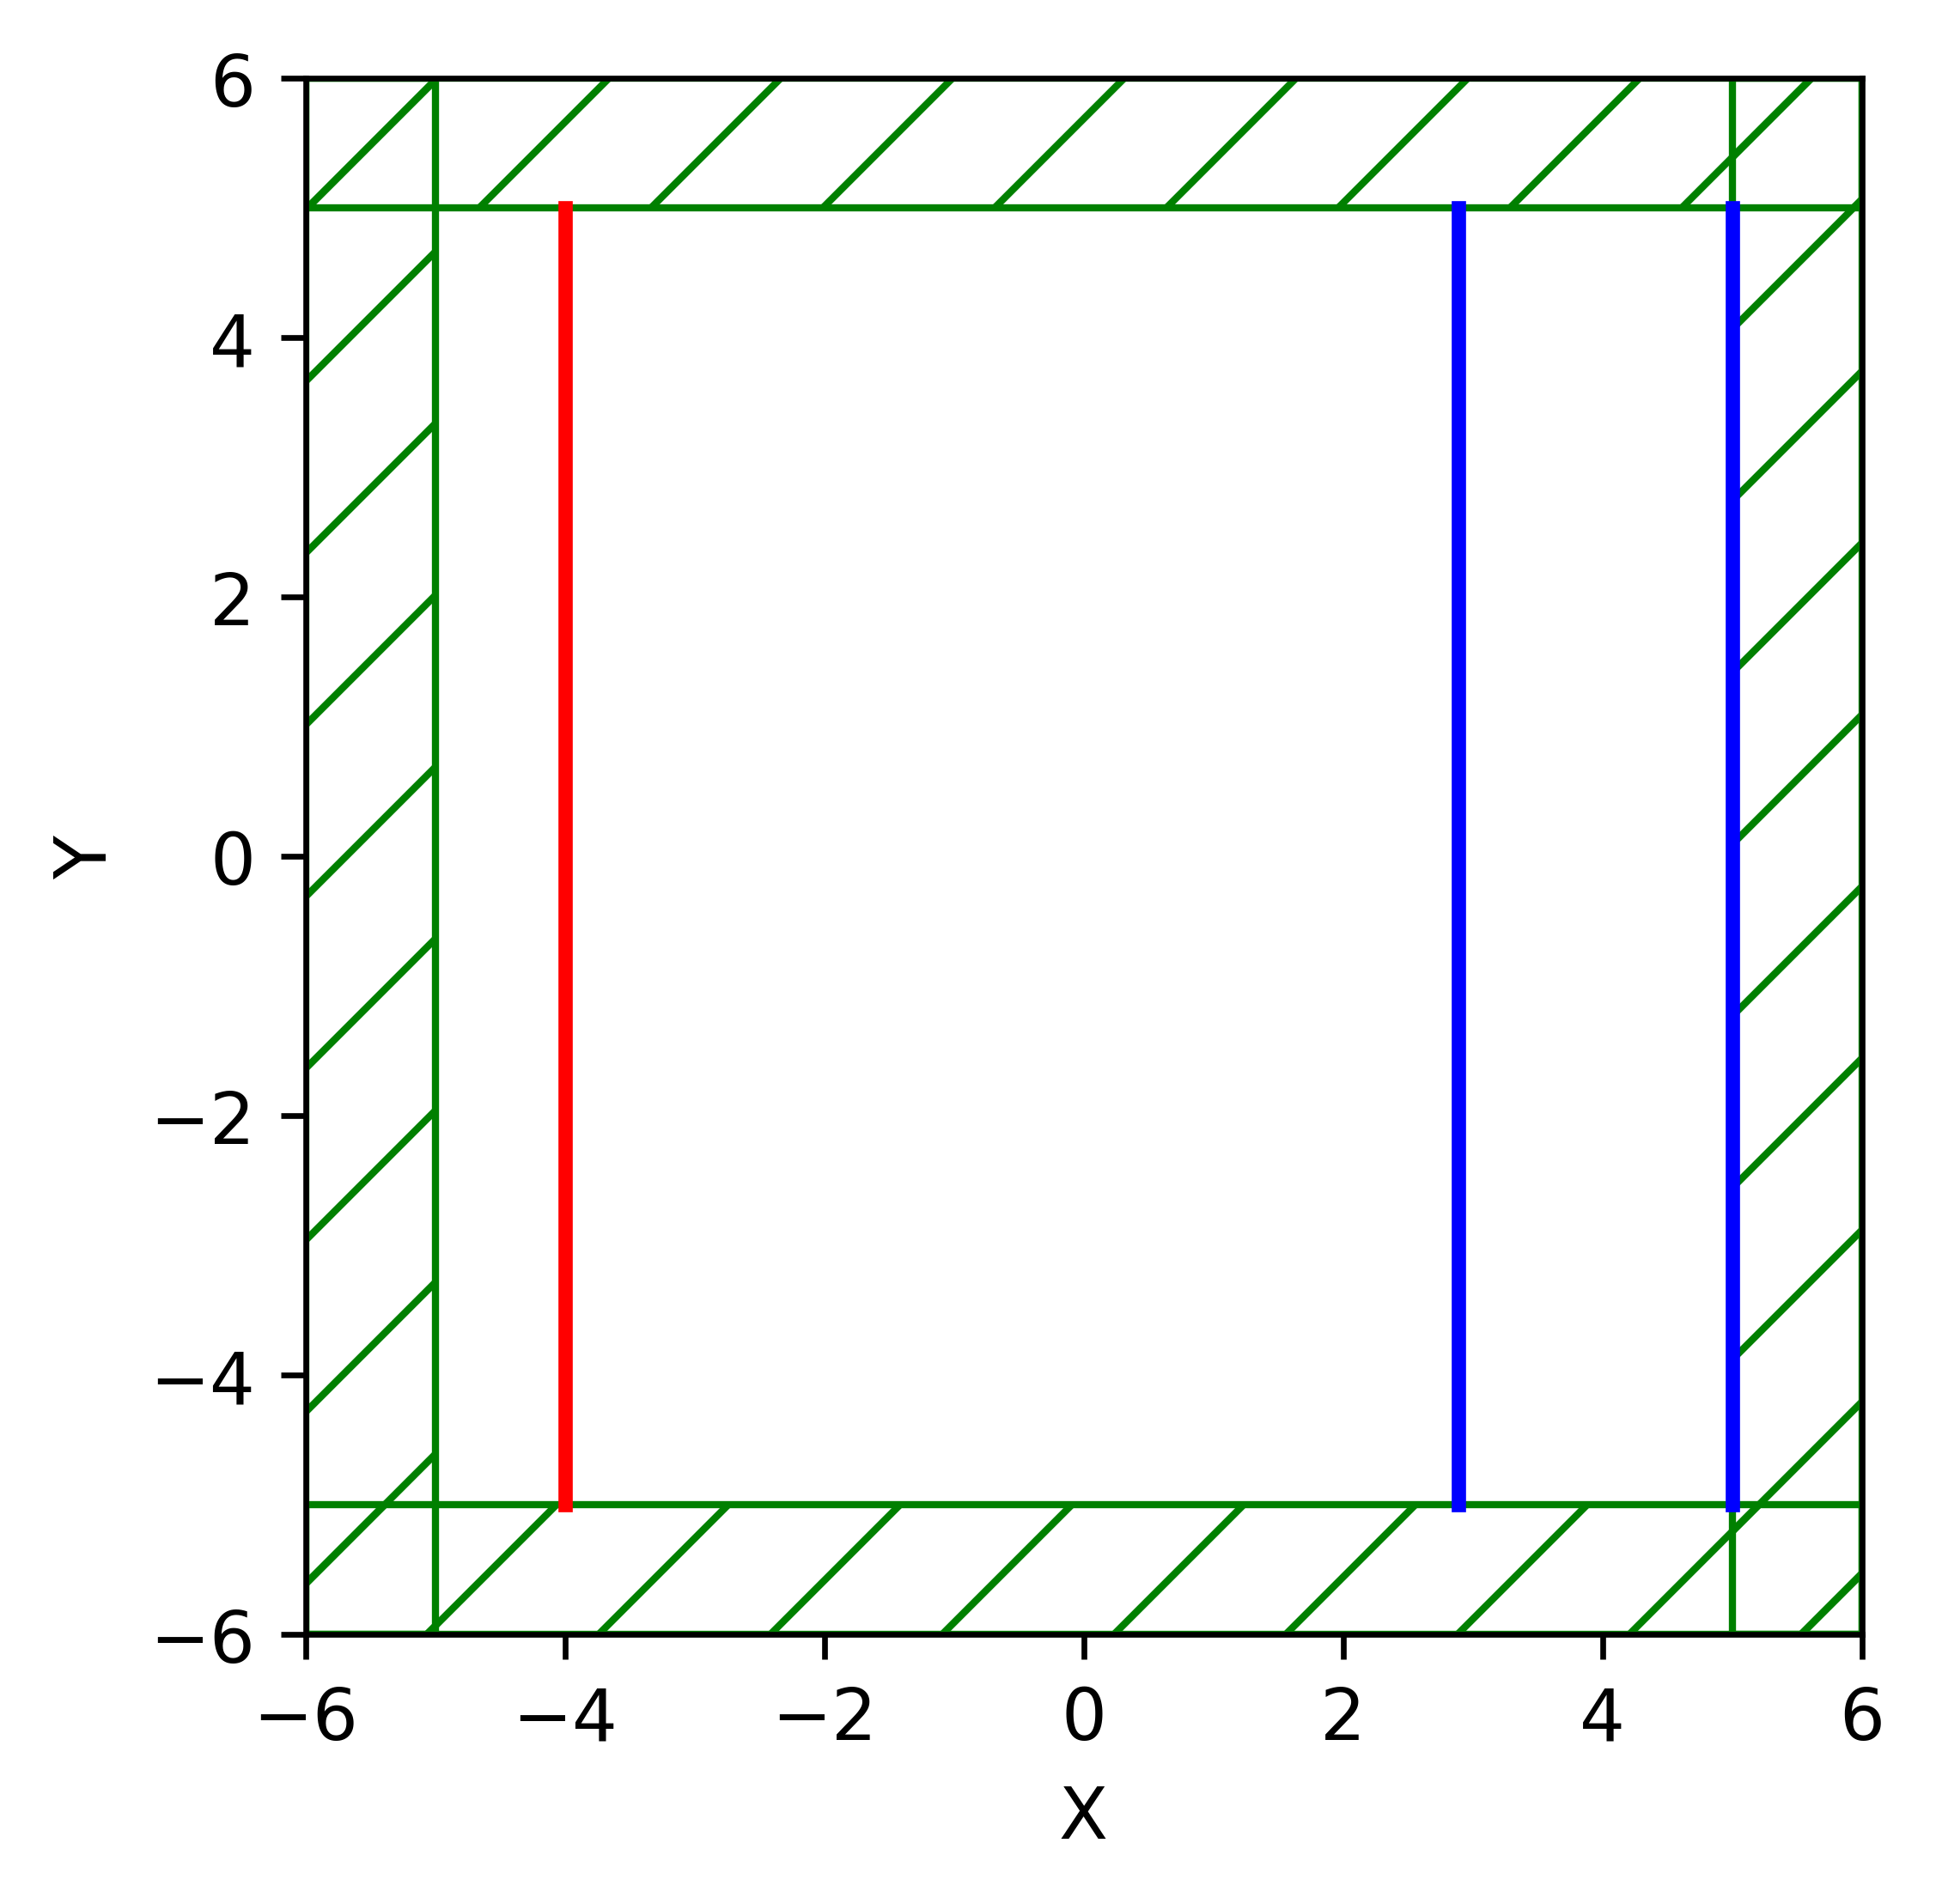

In [36]:
sim = mp.Simulation(cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution)

refl_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx-T_Si-1.1*T_Arc, 0), 
                          size=mp.Vector3(0, sy)

                          )

refl_1 = sim.add_flux(
                      fcen, 
                      df, 
                      nfreq, 
                      refl_1_fr
                      )

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr
                      )

plt.figure(dpi=600)
sim.plot2D()
plt.show()

In [6]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(50, mp.Ez, pt, 1e-3))
no_ARC_refl_data = sim.get_flux_data(refl_1)

creating output file "./eps-000000000.h5"...
on time step 20 (time=0.05), 0.202253 s/step
on time step 44 (time=0.11), 0.173457 s/step
on time step 68 (time=0.17), 0.169073 s/step
on time step 92 (time=0.23), 0.168312 s/step
on time step 115 (time=0.2875), 0.174084 s/step
on time step 136 (time=0.34), 0.196721 s/step
on time step 155 (time=0.3875), 0.210748 s/step
on time step 174 (time=0.435), 0.210837 s/step
on time step 193 (time=0.4825), 0.217624 s/step
on time step 212 (time=0.53), 0.213605 s/step
on time step 233 (time=0.5825), 0.198275 s/step
on time step 254 (time=0.635), 0.199571 s/step
on time step 273 (time=0.6825), 0.211852 s/step
on time step 292 (time=0.73), 0.211337 s/step
on time step 311 (time=0.7775), 0.212818 s/step
on time step 330 (time=0.825), 0.211543 s/step
on time step 349 (time=0.8725), 0.21149 s/step
on time step 368 (time=0.92), 0.212092 s/step
on time step 388 (time=0.97), 0.208927 s/step
on time step 407 (time=1.0175), 0.211354 s/step
on time step 426 (tim

on time step 3206 (time=8.015), 0.220223 s/step
on time step 3224 (time=8.06), 0.224181 s/step
on time step 3243 (time=8.1075), 0.219661 s/step
on time step 3262 (time=8.155), 0.218543 s/step
on time step 3281 (time=8.2025), 0.218583 s/step
on time step 3300 (time=8.25), 0.218685 s/step
on time step 3319 (time=8.2975), 0.219076 s/step
on time step 3338 (time=8.345), 0.217739 s/step
on time step 3354 (time=8.385), 0.256152 s/step
on time step 3373 (time=8.4325), 0.219766 s/step
on time step 3392 (time=8.48), 0.218975 s/step
on time step 3411 (time=8.5275), 0.219767 s/step
on time step 3430 (time=8.575), 0.21743 s/step
on time step 3449 (time=8.6225), 0.216773 s/step
on time step 3468 (time=8.67), 0.216248 s/step
on time step 3486 (time=8.715), 0.225212 s/step
on time step 3505 (time=8.7625), 0.218434 s/step
on time step 3524 (time=8.81), 0.216538 s/step
on time step 3543 (time=8.8575), 0.21906 s/step
on time step 3562 (time=8.905), 0.221064 s/step
on time step 3581 (time=8.9525), 0.2167

on time step 6385 (time=15.9625), 0.214034 s/step
on time step 6404 (time=16.01), 0.214198 s/step
on time step 6423 (time=16.0575), 0.216251 s/step
on time step 6442 (time=16.105), 0.214504 s/step
on time step 6461 (time=16.1525), 0.21744 s/step
on time step 6480 (time=16.2), 0.21878 s/step
on time step 6499 (time=16.2475), 0.21527 s/step
on time step 6518 (time=16.295), 0.217346 s/step
on time step 6537 (time=16.3425), 0.217845 s/step
on time step 6556 (time=16.39), 0.216757 s/step
on time step 6575 (time=16.4375), 0.216396 s/step
on time step 6594 (time=16.485), 0.215761 s/step
on time step 6613 (time=16.5325), 0.215918 s/step
on time step 6632 (time=16.58), 0.21869 s/step
on time step 6651 (time=16.6275), 0.218708 s/step
on time step 6670 (time=16.675), 0.216424 s/step
on time step 6689 (time=16.7225), 0.217738 s/step
on time step 6708 (time=16.77), 0.216904 s/step
on time step 6727 (time=16.8175), 0.217354 s/step
on time step 6746 (time=16.865), 0.219982 s/step
on time step 6765 (t

on time step 9573 (time=23.9325), 0.217138 s/step
on time step 9592 (time=23.98), 0.218433 s/step
on time step 9611 (time=24.0275), 0.221629 s/step
on time step 9630 (time=24.075), 0.21576 s/step
on time step 9649 (time=24.1225), 0.216345 s/step
on time step 9668 (time=24.17), 0.216807 s/step
on time step 9687 (time=24.2175), 0.217889 s/step
on time step 9706 (time=24.265), 0.216381 s/step
on time step 9725 (time=24.3125), 0.216791 s/step
on time step 9744 (time=24.36), 0.215857 s/step
on time step 9763 (time=24.4075), 0.216968 s/step
on time step 9782 (time=24.455), 0.215205 s/step
on time step 9801 (time=24.5025), 0.214553 s/step
on time step 9820 (time=24.55), 0.215661 s/step
on time step 9839 (time=24.5975), 0.215406 s/step
on time step 9858 (time=24.645), 0.215007 s/step
on time step 9877 (time=24.6925), 0.215496 s/step
on time step 9896 (time=24.74), 0.21419 s/step
on time step 9915 (time=24.7875), 0.214632 s/step
on time step 9934 (time=24.835), 0.215934 s/step
on time step 9953

on time step 12725 (time=31.8125), 0.217496 s/step
on time step 12744 (time=31.86), 0.217205 s/step
on time step 12762 (time=31.905), 0.222328 s/step
on time step 12781 (time=31.9525), 0.218533 s/step
on time step 12800 (time=32), 0.218355 s/step
on time step 12819 (time=32.0475), 0.217919 s/step
on time step 12838 (time=32.095), 0.218502 s/step
on time step 12857 (time=32.1425), 0.217269 s/step
on time step 12876 (time=32.19), 0.21742 s/step
on time step 12895 (time=32.2375), 0.218069 s/step
on time step 12914 (time=32.285), 0.221243 s/step
on time step 12933 (time=32.3325), 0.219433 s/step
on time step 12952 (time=32.38), 0.218983 s/step
on time step 12971 (time=32.4275), 0.215813 s/step
on time step 12990 (time=32.475), 0.217281 s/step
on time step 13009 (time=32.5225), 0.21644 s/step
on time step 13028 (time=32.57), 0.218512 s/step
on time step 13047 (time=32.6175), 0.218251 s/step
on time step 13066 (time=32.665), 0.21747 s/step
on time step 13085 (time=32.7125), 0.217434 s/step
o

on time step 15823 (time=39.5575), 0.219294 s/step
on time step 15842 (time=39.605), 0.219966 s/step
on time step 15860 (time=39.65), 0.227133 s/step
on time step 15878 (time=39.695), 0.224549 s/step
on time step 15896 (time=39.74), 0.228633 s/step
on time step 15914 (time=39.785), 0.224198 s/step
on time step 15932 (time=39.83), 0.22717 s/step
on time step 15951 (time=39.8775), 0.218161 s/step
on time step 15970 (time=39.925), 0.217487 s/step
on time step 15988 (time=39.97), 0.22705 s/step
on time step 16007 (time=40.0175), 0.220523 s/step
on time step 16026 (time=40.065), 0.217684 s/step
on time step 16044 (time=40.11), 0.224417 s/step
on time step 16063 (time=40.1575), 0.218802 s/step
on time step 16082 (time=40.205), 0.218503 s/step
on time step 16101 (time=40.2525), 0.217259 s/step
on time step 16120 (time=40.3), 0.22184 s/step
on time step 16139 (time=40.3475), 0.221135 s/step
on time step 16158 (time=40.395), 0.21887 s/step
on time step 16177 (time=40.4425), 0.218578 s/step
on t

on time step 18909 (time=47.2725), 0.228906 s/step
on time step 18927 (time=47.3175), 0.222674 s/step
on time step 18945 (time=47.3625), 0.223877 s/step
on time step 18964 (time=47.41), 0.219496 s/step
on time step 18982 (time=47.455), 0.226064 s/step
on time step 19001 (time=47.5025), 0.221312 s/step
on time step 19020 (time=47.55), 0.219553 s/step
on time step 19039 (time=47.5975), 0.221061 s/step
on time step 19058 (time=47.645), 0.218241 s/step
on time step 19077 (time=47.6925), 0.218902 s/step
on time step 19096 (time=47.74), 0.219101 s/step
on time step 19115 (time=47.7875), 0.218952 s/step
on time step 19133 (time=47.8325), 0.223137 s/step
on time step 19152 (time=47.88), 0.218377 s/step
on time step 19171 (time=47.9275), 0.217152 s/step
on time step 19190 (time=47.975), 0.217788 s/step
on time step 19208 (time=48.02), 0.227054 s/step
on time step 19226 (time=48.065), 0.228081 s/step
on time step 19245 (time=48.1125), 0.218392 s/step
on time step 19264 (time=48.16), 0.220742 s/s

on time step 21972 (time=54.93), 0.21899 s/step
on time step 21991 (time=54.9775), 0.218908 s/step
on time step 22010 (time=55.025), 0.217461 s/step
on time step 22029 (time=55.0725), 0.216747 s/step
on time step 22048 (time=55.12), 0.216228 s/step
on time step 22067 (time=55.1675), 0.217241 s/step
on time step 22086 (time=55.215), 0.214963 s/step
on time step 22105 (time=55.2625), 0.215884 s/step
on time step 22124 (time=55.31), 0.216321 s/step
on time step 22143 (time=55.3575), 0.214286 s/step
on time step 22162 (time=55.405), 0.221268 s/step
on time step 22181 (time=55.4525), 0.215988 s/step
on time step 22200 (time=55.5), 0.214184 s/step
on time step 22219 (time=55.5475), 0.216829 s/step
on time step 22238 (time=55.595), 0.217438 s/step
on time step 22257 (time=55.6425), 0.218722 s/step
on time step 22276 (time=55.69), 0.21509 s/step
on time step 22295 (time=55.7375), 0.216305 s/step
on time step 22314 (time=55.785), 0.21874 s/step
on time step 22333 (time=55.8325), 0.218049 s/step

on time step 25073 (time=62.6825), 0.216513 s/step
on time step 25092 (time=62.73), 0.218139 s/step
on time step 25111 (time=62.7775), 0.217581 s/step
on time step 25130 (time=62.825), 0.217118 s/step
on time step 25149 (time=62.8725), 0.216278 s/step
on time step 25168 (time=62.92), 0.218026 s/step
on time step 25187 (time=62.9675), 0.217618 s/step
on time step 25206 (time=63.015), 0.218348 s/step
on time step 25225 (time=63.0625), 0.21725 s/step
on time step 25244 (time=63.11), 0.217731 s/step
on time step 25263 (time=63.1575), 0.218279 s/step
on time step 25282 (time=63.205), 0.22008 s/step
on time step 25301 (time=63.2525), 0.218124 s/step
on time step 25319 (time=63.2975), 0.233272 s/step
on time step 25338 (time=63.345), 0.217737 s/step
on time step 25357 (time=63.3925), 0.217589 s/step
on time step 25375 (time=63.4375), 0.224746 s/step
on time step 25394 (time=63.485), 0.221012 s/step
on time step 25413 (time=63.5325), 0.219954 s/step
on time step 25432 (time=63.58), 0.21482 s/s

on time step 28171 (time=70.4275), 0.220085 s/step
on time step 28189 (time=70.4725), 0.232529 s/step
on time step 28208 (time=70.52), 0.220101 s/step
on time step 28227 (time=70.5675), 0.218634 s/step
on time step 28246 (time=70.615), 0.219425 s/step
on time step 28265 (time=70.6625), 0.21593 s/step
on time step 28284 (time=70.71), 0.21893 s/step
on time step 28303 (time=70.7575), 0.2173 s/step
on time step 28322 (time=70.805), 0.219166 s/step
on time step 28341 (time=70.8525), 0.219648 s/step
on time step 28360 (time=70.9), 0.219064 s/step
on time step 28379 (time=70.9475), 0.218681 s/step
on time step 28398 (time=70.995), 0.220465 s/step
on time step 28417 (time=71.0425), 0.218862 s/step
on time step 28436 (time=71.09), 0.219345 s/step
on time step 28455 (time=71.1375), 0.217794 s/step
on time step 28474 (time=71.185), 0.218158 s/step
on time step 28493 (time=71.2325), 0.218002 s/step
on time step 28512 (time=71.28), 0.217954 s/step
on time step 28531 (time=71.3275), 0.217649 s/step

on time step 31259 (time=78.1475), 0.182437 s/step
on time step 31281 (time=78.2025), 0.182282 s/step
on time step 31304 (time=78.26), 0.18095 s/step
on time step 31327 (time=78.3175), 0.177434 s/step
on time step 31350 (time=78.375), 0.177292 s/step
on time step 31373 (time=78.4325), 0.181703 s/step
on time step 31392 (time=78.48), 0.213189 s/step
on time step 31411 (time=78.5275), 0.219845 s/step
on time step 31430 (time=78.575), 0.219579 s/step
on time step 31449 (time=78.6225), 0.218324 s/step
on time step 31468 (time=78.67), 0.220744 s/step
on time step 31487 (time=78.7175), 0.220849 s/step
on time step 31506 (time=78.765), 0.221247 s/step
on time step 31525 (time=78.8125), 0.216285 s/step
on time step 31544 (time=78.86), 0.219918 s/step
on time step 31563 (time=78.9075), 0.219954 s/step
on time step 31582 (time=78.955), 0.218819 s/step
on time step 31601 (time=79.0025), 0.218595 s/step
on time step 31620 (time=79.05), 0.219164 s/step
on time step 31639 (time=79.0975), 0.22128 s/s

on time step 34375 (time=85.9375), 0.218574 s/step
on time step 34394 (time=85.985), 0.219957 s/step
on time step 34413 (time=86.0325), 0.218863 s/step
on time step 34432 (time=86.08), 0.219023 s/step
on time step 34451 (time=86.1275), 0.21764 s/step
on time step 34470 (time=86.175), 0.218658 s/step
on time step 34489 (time=86.2225), 0.218904 s/step
on time step 34508 (time=86.27), 0.221714 s/step
on time step 34527 (time=86.3175), 0.221636 s/step
on time step 34546 (time=86.365), 0.219504 s/step
on time step 34564 (time=86.41), 0.222481 s/step
on time step 34583 (time=86.4575), 0.219474 s/step
on time step 34602 (time=86.505), 0.219043 s/step
on time step 34621 (time=86.5525), 0.219019 s/step
on time step 34640 (time=86.6), 0.220457 s/step
on time step 34659 (time=86.6475), 0.220576 s/step
on time step 34678 (time=86.695), 0.220328 s/step
on time step 34697 (time=86.7425), 0.221703 s/step
on time step 34716 (time=86.79), 0.220686 s/step
on time step 34735 (time=86.8375), 0.218137 s/st

on time step 37435 (time=93.5875), 0.220642 s/step
on time step 37454 (time=93.635), 0.221607 s/step
on time step 37472 (time=93.68), 0.222934 s/step
on time step 37491 (time=93.7275), 0.221018 s/step
on time step 37509 (time=93.7725), 0.222623 s/step
on time step 37528 (time=93.82), 0.221483 s/step
on time step 37547 (time=93.8675), 0.221888 s/step
on time step 37566 (time=93.915), 0.222326 s/step
on time step 37585 (time=93.9625), 0.22107 s/step
on time step 37604 (time=94.01), 0.220505 s/step
on time step 37623 (time=94.0575), 0.221588 s/step
on time step 37642 (time=94.105), 0.219607 s/step
on time step 37660 (time=94.15), 0.222462 s/step
on time step 37678 (time=94.195), 0.223127 s/step
on time step 37696 (time=94.24), 0.223303 s/step
on time step 37715 (time=94.2875), 0.221607 s/step
on time step 37733 (time=94.3325), 0.223315 s/step
on time step 37752 (time=94.38), 0.222112 s/step
on time step 37771 (time=94.4275), 0.219479 s/step
on time step 37790 (time=94.475), 0.222313 s/ste

In [7]:
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)
no_ARC_tran_flux = mp.get_fluxes(tran_1)
no_ARC_refl_flux = mp.get_fluxes(refl_1)


no_ARC_ttran_flux = np.asarray(mp.get_fluxes(tran_1))
no_ARC_rrefl_flux = np.asarray(mp.get_fluxes(refl_1))
no_ARC_ttran_flux + no_ARC_rrefl_flux

array([2.75457673e-06, 2.87419445e-06, 2.99875301e-06, 3.12844513e-06,
       3.26347056e-06, 3.40403633e-06, 3.55035698e-06, 3.70265478e-06,
       3.86116003e-06, 4.02611131e-06, 4.19775576e-06, 4.37634938e-06,
       4.56215731e-06, 4.75545409e-06, 4.95652402e-06, 5.16566142e-06,
       5.38317103e-06, 5.60936826e-06, 5.84457964e-06, 6.08914309e-06,
       6.34340834e-06, 6.60773723e-06, 6.88250415e-06, 7.16809645e-06,
       7.46491479e-06, 7.77337365e-06, 8.09390169e-06, 8.42694224e-06,
       8.77295367e-06, 9.13240994e-06, 9.50580104e-06, 9.89363349e-06,
       1.02964309e-05, 1.07147344e-05, 1.11491032e-05, 1.16001154e-05,
       1.20683679e-05, 1.25544775e-05, 1.30590817e-05, 1.35828386e-05,
       1.41264280e-05, 1.46905522e-05, 1.52759361e-05, 1.58833283e-05,
       1.65135016e-05, 1.71672539e-05, 1.78454086e-05, 1.85488158e-05,
       1.92783526e-05, 2.00349241e-05, 2.08194643e-05, 2.16329365e-05,
       2.24763349e-05, 2.33506844e-05, 2.42570426e-05, 2.51965000e-05,
      

-----------
Initializing structure...
time for choose_chunkdivision = 0.00246382 s
Working in 2D dimensions.
Computational cell is 12 x 12 x 0 with resolution 200
     block, center = (4,0,0)
          size (2,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (2.95,0,0)
          size (0.1,10,1e+20)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     cone, center = (3.15,4.675,0)
          radius 0, height 0.5, axis (-1, 0, 0)
          radius2 0.1875
          dielectric constant epsilon diagonal = (1,1,1)
     cone, center = (3.15,4.05,0)
          radius 0, height 0.5, axis (-1, 0, 0)
          radius2 0.1875
          dielectric constant epsilon diagonal = (1,1,1)
     cone, center = (3.15,3.425,0)
          radius 0, height 0.5, axis (-1, 0, 0)
          radius2 0.1875
          dielectric constant epsilon diagonal = (1,1,1)
     cone, center = (3.15,2.

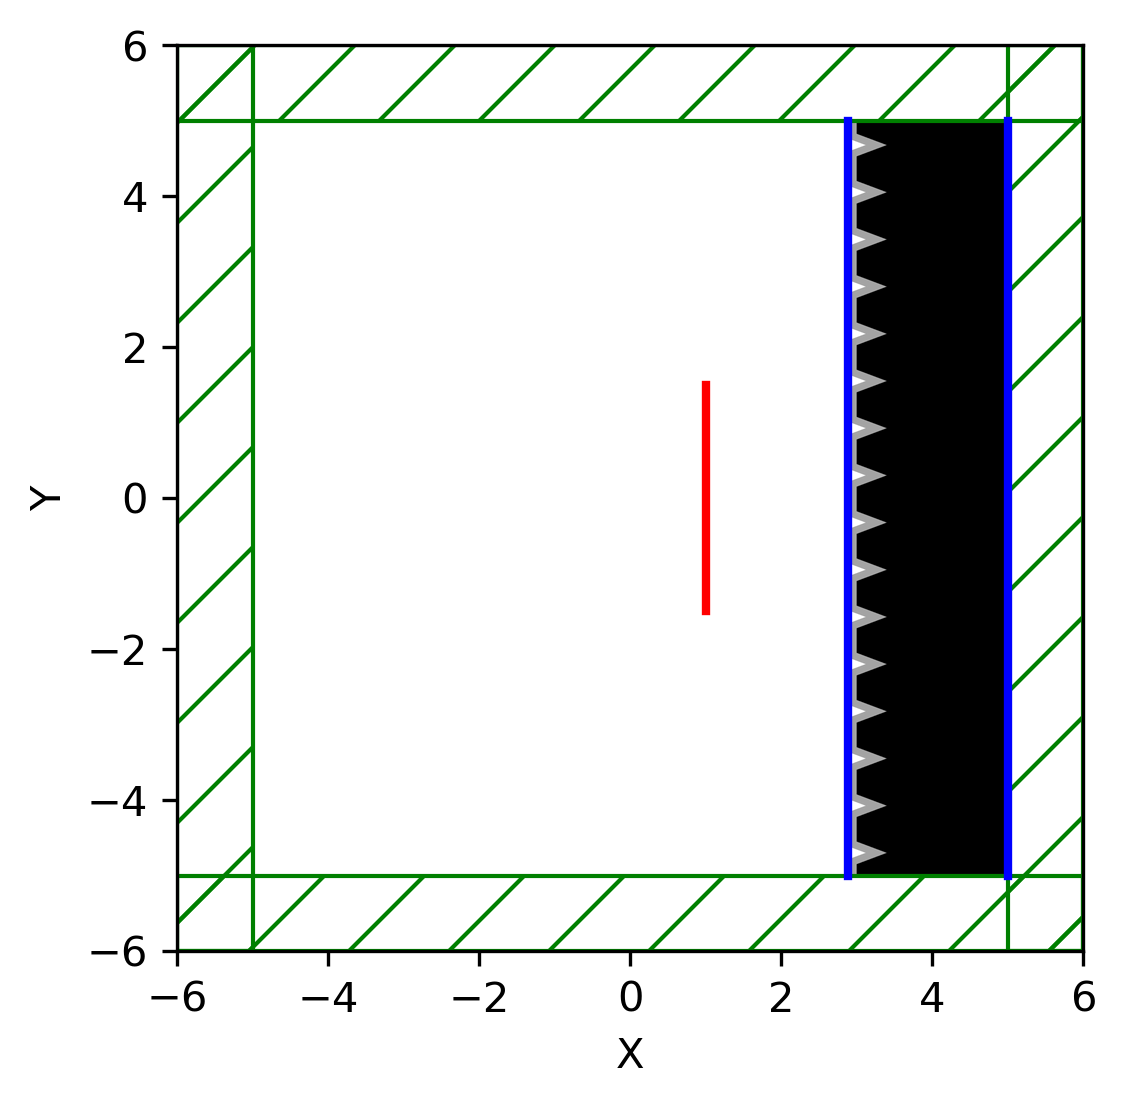

In [8]:
sim.reset_meep()

#from mpmath import *


# Design texture
size_x = 0.4
size_y = 0.3
N = 15
D = (sy)/(N+1)


geometry = [mp.Block(
                    size = mp.Vector3(T_Si, sy, mp.inf), 
                    center = mp.Vector3(0.5*sx-0.5*(T_Si), 0),
                    material = cSi
                     ),
            mp.Block(
                    size=mp.Vector3(T_Arc, sy, mp.inf), 
                    center=mp.Vector3(0.5*sx-0.5*T_Arc-T_Si, 0),
                    material=Si3N4
                     )
           ]
'''
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Cone(
                            radius = 0,
                            radius2 = 0.5*size_y*((size_x+T_Arc)/size_x),
                            height = size_x+T_Arc,
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc)+0.5*(size_x+T_Arc), 
                                                -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            axis = mp.Vector3(-1,0,0)
                            
                           )
                            )
'''      
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Cone(
                            radius = 0,
                            radius2 = 0.5*size_y*((size_x+T_Arc)/size_x),
                            height = size_x+T_Arc,
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc)+0.5*(size_x+T_Arc), 
                                                -0.5*sy+size_y+D*i), 
                            material = Si3N4,
                            axis = mp.Vector3(-1,0,0)
                            
                           )
                            )
        
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Cone(
                            radius = 0,
                            radius2 = 0.5*size_y*((size_x+T_Arc)/size_x),
                            height = size_x+T_Arc,
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc)+0.5*(size_x+T_Arc)-(1*T_Arc)/(mh.sin(mh.atan((0.5*size_y)/size_x))), 
                                                -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            axis = mp.Vector3(-1,0,0)
                            
                           )
                            )
        
'''          
for i in range(N, -1, -1):
            geometry.append( 
                   mp.Cone(
                            radius = 0,
                            radius2 = size_y,
                            height = size_x,
                            center = mp.Vector3(0.5*sx-(T_Si+T_Arc-0.5*size_x), -0.5*sy+size_y+D*i), 
                            material = mp.Medium(epsilon=eps_air),
                            axis = mp.Vector3(-1,0,0)
                            
                           )
                            )        
'''
geometry.append( 
            mp.Block(
                    size = mp.Vector3(2*T_Arc, sy, mp.inf),
                    center = (0.5*sx-(T_Si+T_Arc)-T_Arc, 0), 
                      material = mp.Medium(epsilon=eps_air),
                     )
                ) 
        
sim = mp.Simulation(
                    cell_size=cell,
                    boundary_layers=pml_layers,
                    geometry=geometry,
                    sources=sources,
                    resolution=resolution
                    )

#refl_1_fr = mp.FluxRegion(
#                          center=mp.Vector3(0.5*sx-dpml-0.5*T_Si-1.1*T_Arc, 0),
#                          size=mp.Vector3(0, sy)
#                          )

refl_1 = sim.add_flux(fcen, df, nfreq, refl_1_fr)

tran_1_fr = mp.FluxRegion(center=mp.Vector3(0.5*sx, 0), 
                          size=mp.Vector3(0, sy)
                          )
tran_1 = sim.add_flux(fcen, 
                      df, 
                      nfreq, 
                      tran_1_fr 
                      )

sim.load_minus_flux_data(refl_1, no_ARC_refl_data)

plt.figure(dpi=300)
sim.plot2D()
plt.show()


In [9]:
pt = mp.Vector3(0.5*sx-0.1, 0)
sim.run(mp.at_beginning(mp.output_epsilon),
                until_after_sources=mp.stop_when_fields_decayed(20, mp.Ez, pt, 1e-3))

with_ARC_refl_flux = mp.get_fluxes(refl_1)
with_ARC_tran_flux = mp.get_fluxes(tran_1)

flux_freqs = mp.get_flux_freqs(refl_1)

creating output file "./eps-000000000.h5"...


/opt/anaconda/anaconda3/envs/pmp/lib/python3.9/site-packages/meep/simulation.py:1330: RuntimeWarning: Note: your sources include frequencies outside the range of validity of the material models. This is fine as long as you eventually only look at outputs (fluxes, resonant modes, etc.) at valid frequencies.
  warnings.warn(warn_src, RuntimeWarning)
/opt/anaconda/anaconda3/envs/pmp/lib/python3.9/site-packages/meep/simulation.py:1334: RuntimeWarning: DFT frequency 1.0 is out of material's range of 1.2048192771084338-2.5
  warnings.warn(warn_dft_fmt.format(dftf, min_freq, max_freq), RuntimeWarning)


on time step 7 (time=0.0175), 0.614403 s/step
on time step 15 (time=0.0375), 0.502503 s/step
on time step 23 (time=0.0575), 0.504746 s/step
on time step 32 (time=0.08), 0.499773 s/step
on time step 41 (time=0.1025), 0.500235 s/step
on time step 50 (time=0.125), 0.495873 s/step
on time step 59 (time=0.1475), 0.495778 s/step
on time step 67 (time=0.1675), 0.500047 s/step
on time step 75 (time=0.1875), 0.500541 s/step
on time step 84 (time=0.21), 0.498862 s/step
on time step 93 (time=0.2325), 0.497712 s/step
on time step 102 (time=0.255), 0.498766 s/step
on time step 111 (time=0.2775), 0.49589 s/step
on time step 120 (time=0.3), 0.49501 s/step
on time step 129 (time=0.3225), 0.495035 s/step
on time step 138 (time=0.345), 0.496552 s/step
on time step 147 (time=0.3675), 0.496433 s/step
on time step 156 (time=0.39), 0.496356 s/step
on time step 165 (time=0.4125), 0.495466 s/step
on time step 174 (time=0.435), 0.493675 s/step
on time step 183 (time=0.4575), 0.49392 s/step
on time step 192 (ti

on time step 1450 (time=3.625), 0.509306 s/step
on time step 1458 (time=3.645), 0.511448 s/step
on time step 1466 (time=3.665), 0.511299 s/step
on time step 1474 (time=3.685), 0.509805 s/step
on time step 1482 (time=3.705), 0.508181 s/step
on time step 1490 (time=3.725), 0.506326 s/step
on time step 1498 (time=3.745), 0.509249 s/step
on time step 1506 (time=3.765), 0.507285 s/step
on time step 1514 (time=3.785), 0.507114 s/step
on time step 1522 (time=3.805), 0.508879 s/step
on time step 1530 (time=3.825), 0.508028 s/step
on time step 1538 (time=3.845), 0.508146 s/step
on time step 1546 (time=3.865), 0.506526 s/step
on time step 1554 (time=3.885), 0.505366 s/step
on time step 1562 (time=3.905), 0.50873 s/step
on time step 1570 (time=3.925), 0.510116 s/step
on time step 1578 (time=3.945), 0.509916 s/step
on time step 1586 (time=3.965), 0.510139 s/step
on time step 1594 (time=3.985), 0.508804 s/step
on time step 1602 (time=4.005), 0.504561 s/step
on time step 1610 (time=4.025), 0.505785 

on time step 2847 (time=7.1175), 0.500599 s/step
on time step 2856 (time=7.14), 0.497412 s/step
on time step 2865 (time=7.1625), 0.499444 s/step
on time step 2873 (time=7.1825), 0.502574 s/step
on time step 2881 (time=7.2025), 0.509819 s/step
on time step 2889 (time=7.2225), 0.515825 s/step
on time step 2897 (time=7.2425), 0.51429 s/step
on time step 2905 (time=7.2625), 0.523141 s/step
on time step 2913 (time=7.2825), 0.518114 s/step
on time step 2921 (time=7.3025), 0.516881 s/step
on time step 2929 (time=7.3225), 0.506563 s/step
on time step 2937 (time=7.3425), 0.500758 s/step
on time step 2945 (time=7.3625), 0.501124 s/step
on time step 2954 (time=7.385), 0.498982 s/step
on time step 2962 (time=7.405), 0.503307 s/step
on time step 2970 (time=7.425), 0.503352 s/step
on time step 2978 (time=7.445), 0.501948 s/step
on time step 2986 (time=7.465), 0.501462 s/step
on time step 2994 (time=7.485), 0.500144 s/step
on time step 3003 (time=7.5075), 0.498802 s/step
on time step 3011 (time=7.527

on time step 4257 (time=10.6425), 0.51718 s/step
on time step 4265 (time=10.6625), 0.5213 s/step
on time step 4273 (time=10.6825), 0.516447 s/step
on time step 4281 (time=10.7025), 0.511368 s/step
on time step 4289 (time=10.7225), 0.515096 s/step
on time step 4297 (time=10.7425), 0.515038 s/step
on time step 4305 (time=10.7625), 0.500246 s/step
on time step 4314 (time=10.785), 0.497066 s/step
on time step 4323 (time=10.8075), 0.497717 s/step
on time step 4331 (time=10.8275), 0.500115 s/step
on time step 4340 (time=10.85), 0.498549 s/step
on time step 4349 (time=10.8725), 0.499899 s/step
on time step 4357 (time=10.8925), 0.50058 s/step
on time step 4366 (time=10.915), 0.500859 s/step
on time step 4374 (time=10.935), 0.500359 s/step
on time step 4382 (time=10.955), 0.500946 s/step
on time step 4391 (time=10.9775), 0.495237 s/step
on time step 4400 (time=11), 0.498231 s/step
on time step 4408 (time=11.02), 0.500103 s/step
on time step 4417 (time=11.0425), 0.500107 s/step
on time step 4426

on time step 5687 (time=14.2175), 0.49655 s/step
on time step 5695 (time=14.2375), 0.501537 s/step
on time step 5703 (time=14.2575), 0.501011 s/step
on time step 5711 (time=14.2775), 0.502221 s/step
on time step 5719 (time=14.2975), 0.503578 s/step
on time step 5727 (time=14.3175), 0.502959 s/step
on time step 5735 (time=14.3375), 0.502531 s/step
on time step 5743 (time=14.3575), 0.501859 s/step
on time step 5751 (time=14.3775), 0.500429 s/step
on time step 5759 (time=14.3975), 0.500248 s/step
on time step 5767 (time=14.4175), 0.502022 s/step
on time step 5776 (time=14.44), 0.498717 s/step
on time step 5785 (time=14.4625), 0.496409 s/step
on time step 5794 (time=14.485), 0.491357 s/step
on time step 5803 (time=14.5075), 0.495206 s/step
on time step 5812 (time=14.53), 0.497771 s/step
on time step 5820 (time=14.55), 0.500283 s/step
on time step 5829 (time=14.5725), 0.498867 s/step
on time step 5837 (time=14.5925), 0.501326 s/step
on time step 5845 (time=14.6125), 0.502195 s/step
on time 

on time step 7108 (time=17.77), 0.501417 s/step
on time step 7116 (time=17.79), 0.501017 s/step
on time step 7125 (time=17.8125), 0.498802 s/step
on time step 7133 (time=17.8325), 0.502793 s/step
on time step 7141 (time=17.8525), 0.503522 s/step
on time step 7149 (time=17.8725), 0.5037 s/step
on time step 7157 (time=17.8925), 0.502885 s/step
on time step 7165 (time=17.9125), 0.515623 s/step
on time step 7173 (time=17.9325), 0.508688 s/step
on time step 7182 (time=17.955), 0.498872 s/step
on time step 7191 (time=17.9775), 0.498326 s/step
on time step 7200 (time=18), 0.498882 s/step
on time step 7209 (time=18.0225), 0.498315 s/step
on time step 7218 (time=18.045), 0.500145 s/step
on time step 7227 (time=18.0675), 0.500329 s/step
on time step 7235 (time=18.0875), 0.501638 s/step
on time step 7243 (time=18.1075), 0.503547 s/step
on time step 7251 (time=18.1275), 0.504379 s/step
on time step 7259 (time=18.1475), 0.504453 s/step
on time step 7267 (time=18.1675), 0.500532 s/step
on time step 

on time step 8774 (time=21.935), 0.396173 s/step
on time step 8785 (time=21.9625), 0.397373 s/step
on time step 8796 (time=21.99), 0.396635 s/step
on time step 8807 (time=22.0175), 0.394067 s/step
on time step 8818 (time=22.045), 0.397143 s/step
on time step 8829 (time=22.0725), 0.393749 s/step
on time step 8840 (time=22.1), 0.389025 s/step
on time step 8851 (time=22.1275), 0.39926 s/step
on time step 8861 (time=22.1525), 0.401953 s/step
on time step 8872 (time=22.18), 0.3987 s/step
on time step 8883 (time=22.2075), 0.397667 s/step
on time step 8894 (time=22.235), 0.397359 s/step
on time step 8905 (time=22.2625), 0.396479 s/step
on time step 8916 (time=22.29), 0.399005 s/step
on time step 8927 (time=22.3175), 0.397351 s/step
on time step 8938 (time=22.345), 0.395826 s/step
on time step 8949 (time=22.3725), 0.398168 s/step
on time step 8960 (time=22.4), 0.399675 s/step
on time step 8971 (time=22.4275), 0.392645 s/step
on time step 8982 (time=22.455), 0.396233 s/step
on time step 8993 (t

on time step 10548 (time=26.37), 0.395718 s/step
on time step 10558 (time=26.395), 0.401311 s/step
on time step 10568 (time=26.42), 0.401032 s/step
on time step 10578 (time=26.445), 0.400303 s/step
on time step 10588 (time=26.47), 0.400512 s/step
on time step 10598 (time=26.495), 0.402528 s/step
on time step 10609 (time=26.5225), 0.39875 s/step
on time step 10620 (time=26.55), 0.397792 s/step
on time step 10631 (time=26.5775), 0.399321 s/step
on time step 10641 (time=26.6025), 0.401812 s/step
on time step 10651 (time=26.6275), 0.401097 s/step
on time step 10661 (time=26.6525), 0.400697 s/step
on time step 10671 (time=26.6775), 0.402368 s/step
on time step 10681 (time=26.7025), 0.401824 s/step
on time step 10691 (time=26.7275), 0.400707 s/step
on time step 10701 (time=26.7525), 0.407603 s/step
on time step 10712 (time=26.78), 0.392869 s/step
on time step 10722 (time=26.805), 0.401759 s/step
on time step 10732 (time=26.83), 0.40234 s/step
on time step 10742 (time=26.855), 0.403448 s/step

on time step 12266 (time=30.665), 0.403528 s/step
on time step 12277 (time=30.6925), 0.398403 s/step
on time step 12288 (time=30.72), 0.39627 s/step
on time step 12299 (time=30.7475), 0.395195 s/step
on time step 12310 (time=30.775), 0.392988 s/step
on time step 12321 (time=30.8025), 0.398928 s/step
on time step 12332 (time=30.83), 0.395446 s/step
on time step 12343 (time=30.8575), 0.398296 s/step
on time step 12354 (time=30.885), 0.394987 s/step
on time step 12364 (time=30.91), 0.402198 s/step
on time step 12375 (time=30.9375), 0.397856 s/step
on time step 12386 (time=30.965), 0.394812 s/step
on time step 12397 (time=30.9925), 0.393915 s/step
on time step 12408 (time=31.02), 0.398723 s/step
on time step 12419 (time=31.0475), 0.396271 s/step
on time step 12430 (time=31.075), 0.398385 s/step
on time step 12441 (time=31.1025), 0.398996 s/step
on time step 12452 (time=31.13), 0.399681 s/step
on time step 12463 (time=31.1575), 0.39976 s/step
on time step 12474 (time=31.185), 0.398247 s/ste

on time step 14052 (time=35.13), 0.397191 s/step
on time step 14063 (time=35.1575), 0.388574 s/step
on time step 14074 (time=35.185), 0.396489 s/step
on time step 14085 (time=35.2125), 0.396852 s/step
on time step 14096 (time=35.24), 0.394371 s/step
on time step 14107 (time=35.2675), 0.395536 s/step
on time step 14118 (time=35.295), 0.399548 s/step
on time step 14129 (time=35.3225), 0.397253 s/step
on time step 14140 (time=35.35), 0.390438 s/step
on time step 14151 (time=35.3775), 0.393808 s/step
on time step 14161 (time=35.4025), 0.403323 s/step
on time step 14172 (time=35.43), 0.397678 s/step
on time step 14183 (time=35.4575), 0.399668 s/step
on time step 14194 (time=35.485), 0.399084 s/step
on time step 14205 (time=35.5125), 0.400073 s/step
on time step 14216 (time=35.54), 0.39795 s/step
on time step 14226 (time=35.565), 0.400567 s/step
on time step 14236 (time=35.59), 0.407936 s/step
on time step 14247 (time=35.6175), 0.399227 s/step
on time step 14258 (time=35.645), 0.398794 s/ste

on time step 15787 (time=39.4675), 0.396562 s/step
on time step 15797 (time=39.4925), 0.400883 s/step
on time step 15808 (time=39.52), 0.39795 s/step
on time step 15818 (time=39.545), 0.403841 s/step
on time step 15828 (time=39.57), 0.40122 s/step
on time step 15838 (time=39.595), 0.404794 s/step
on time step 15848 (time=39.62), 0.403456 s/step
on time step 15858 (time=39.645), 0.403392 s/step
on time step 15868 (time=39.67), 0.401517 s/step
on time step 15878 (time=39.695), 0.401934 s/step
on time step 15888 (time=39.72), 0.400993 s/step
on time step 15898 (time=39.745), 0.403938 s/step
on time step 15909 (time=39.7725), 0.402918 s/step
on time step 15919 (time=39.7975), 0.40098 s/step
on time step 15929 (time=39.8225), 0.40259 s/step
on time step 15939 (time=39.8475), 0.404559 s/step
on time step 15949 (time=39.8725), 0.403487 s/step
on time step 15959 (time=39.8975), 0.405253 s/step
on time step 15969 (time=39.9225), 0.403174 s/step
on time step 15979 (time=39.9475), 0.401701 s/step

on time step 17501 (time=43.7525), 0.398331 s/step
on time step 17512 (time=43.78), 0.399732 s/step
on time step 17523 (time=43.8075), 0.398268 s/step
on time step 17534 (time=43.835), 0.397614 s/step
on time step 17544 (time=43.86), 0.402267 s/step
on time step 17555 (time=43.8875), 0.396319 s/step
on time step 17566 (time=43.915), 0.398298 s/step
on time step 17576 (time=43.94), 0.400445 s/step
on time step 17587 (time=43.9675), 0.397721 s/step
on time step 17598 (time=43.995), 0.394693 s/step
on time step 17608 (time=44.02), 0.404835 s/step
on time step 17618 (time=44.045), 0.405762 s/step
on time step 17628 (time=44.07), 0.401524 s/step
on time step 17639 (time=44.0975), 0.394647 s/step
on time step 17650 (time=44.125), 0.396342 s/step
on time step 17661 (time=44.1525), 0.396619 s/step
on time step 17672 (time=44.18), 0.398155 s/step
on time step 17683 (time=44.2075), 0.394537 s/step
on time step 17693 (time=44.2325), 0.402425 s/step
on time step 17703 (time=44.2575), 0.402124 s/st

on time step 19234 (time=48.085), 0.403897 s/step
on time step 19244 (time=48.11), 0.409944 s/step
on time step 19254 (time=48.135), 0.411674 s/step
on time step 19264 (time=48.16), 0.41174 s/step
on time step 19274 (time=48.185), 0.411742 s/step
on time step 19284 (time=48.21), 0.412662 s/step
on time step 19294 (time=48.235), 0.410922 s/step
on time step 19304 (time=48.26), 0.411217 s/step
on time step 19314 (time=48.285), 0.411657 s/step
on time step 19324 (time=48.31), 0.411304 s/step
on time step 19334 (time=48.335), 0.410597 s/step
on time step 19344 (time=48.36), 0.411264 s/step
on time step 19354 (time=48.385), 0.408613 s/step
on time step 19364 (time=48.41), 0.411907 s/step
on time step 19374 (time=48.435), 0.41634 s/step
on time step 19384 (time=48.46), 0.41327 s/step
on time step 19394 (time=48.485), 0.415995 s/step
on time step 19404 (time=48.51), 0.410691 s/step
on time step 19414 (time=48.535), 0.410448 s/step
on time step 19424 (time=48.56), 0.411204 s/step
on time step 

on time step 20932 (time=52.33), 0.399527 s/step
on time step 20943 (time=52.3575), 0.39053 s/step
on time step 20954 (time=52.385), 0.394385 s/step
on time step 20965 (time=52.4125), 0.390423 s/step
on time step 20976 (time=52.44), 0.395189 s/step
on time step 20986 (time=52.465), 0.402102 s/step
on time step 20997 (time=52.4925), 0.395102 s/step
on time step 21008 (time=52.52), 0.396807 s/step
on time step 21019 (time=52.5475), 0.38897 s/step
on time step 21030 (time=52.575), 0.386971 s/step
on time step 21041 (time=52.6025), 0.393976 s/step
on time step 21052 (time=52.63), 0.392469 s/step
on time step 21063 (time=52.6575), 0.39759 s/step
on time step 21074 (time=52.685), 0.384926 s/step
on time step 21085 (time=52.7125), 0.388559 s/step
on time step 21096 (time=52.74), 0.392048 s/step
on time step 21107 (time=52.7675), 0.385732 s/step
on time step 21118 (time=52.795), 0.386993 s/step
on time step 21129 (time=52.8225), 0.393312 s/step
on time step 21140 (time=52.85), 0.399331 s/step


on time step 22660 (time=56.65), 0.406979 s/step
on time step 22671 (time=56.6775), 0.397522 s/step
on time step 22682 (time=56.705), 0.39939 s/step
on time step 22692 (time=56.73), 0.405 s/step
on time step 22702 (time=56.755), 0.419434 s/step
on time step 22712 (time=56.78), 0.400159 s/step
on time step 22722 (time=56.805), 0.400301 s/step
on time step 22733 (time=56.8325), 0.399207 s/step
on time step 22744 (time=56.86), 0.400085 s/step
on time step 22755 (time=56.8875), 0.398968 s/step
on time step 22765 (time=56.9125), 0.404018 s/step
on time step 22775 (time=56.9375), 0.406682 s/step
on time step 22785 (time=56.9625), 0.424519 s/step
on time step 22795 (time=56.9875), 0.402581 s/step
on time step 22805 (time=57.0125), 0.418135 s/step
on time step 22815 (time=57.0375), 0.405642 s/step
on time step 22825 (time=57.0625), 0.415925 s/step
on time step 22835 (time=57.0875), 0.401659 s/step
on time step 22845 (time=57.1125), 0.400598 s/step
on time step 22855 (time=57.1375), 0.401039 s/

In [10]:
no_ARC_refl_data

FluxData(E=array([-1.59604744e-07-3.30370229e-08j, -1.57296766e-07-4.52481920e-08j,
       -1.53997651e-07-5.72423403e-08j, ...,
       -9.89232324e-09+3.62321424e-09j, -9.50323539e-09+3.27278957e-09j,
       -9.14547740e-09+2.98603921e-09j]), H=array([-2.83306602e-05+2.59780238e-06j, -2.87082639e-05+6.05843062e-07j,
       -2.89417408e-05-1.41840116e-06j, ...,
       -2.36060395e-05+1.67063931e-05j, -2.38495518e-05+1.51024493e-05j,
       -2.40202580e-05+1.35430004e-05j]))

In [11]:
no_ARC_refl_flux

[1.3947036106871397e-06,
 1.4551625275857307e-06,
 1.5181104100543742e-06,
 1.583643889611706e-06,
 1.6518631113059326e-06,
 1.7228718512270717e-06,
 1.7967776334580921e-06,
 1.8736918496473523e-06,
 1.9537298853287436e-06,
 2.0370112550200226e-06,
 2.123659744467376e-06,
 2.2138035559012453e-06,
 2.307575452797417e-06,
 2.4051129040518662e-06,
 2.5065582311955986e-06,
 2.6120587634692393e-06,
 2.7217670032241344e-06,
 2.835840799868506e-06,
 2.954443527578043e-06,
 3.0777442626296483e-06,
 3.2059179601096954e-06,
 3.3391456341172477e-06,
 3.477614547076048e-06,
 3.6215184111386482e-06,
 3.771057599743657e-06,
 3.926439363830403e-06,
 4.087878047809838e-06,
 4.255595304852131e-06,
 4.429820316148403e-06,
 4.610790020668369e-06,
 4.798749359004539e-06,
 4.993951529212068e-06,
 5.196658248332346e-06,
 5.4071400138276914e-06,
 5.625676364232184e-06,
 5.8525561442671955e-06,
 6.088077781973778e-06,
 6.33254958216658e-06,
 6.5862900339704885e-06,
 6.849628125212285e-06,
 7.122903656883922e-

In [12]:
with_ARC_refl_flux

[-3.951101646050247e-07,
 -3.7411117853056745e-07,
 -3.5343690822122836e-07,
 -3.3503622332033814e-07,
 -3.194219219140849e-07,
 -3.0570992621094265e-07,
 -2.920229924170888e-07,
 -2.761559786594151e-07,
 -2.5633088188263823e-07,
 -2.3184331149165298e-07,
 -2.0342651805223712e-07,
 -1.7323035651230174e-07,
 -1.444139326971396e-07,
 -1.20456603093982e-07,
 -1.0437427245655333e-07,
 -9.806301156515621e-08,
 -1.019675272190933e-07,
 -1.1519077232111897e-07,
 -1.3604125253219483e-07,
 -1.628862958961186e-07,
 -1.9507716509606255e-07,
 -2.3366558036300982e-07,
 -2.8165854056292607e-07,
 -3.4365860656655077e-07,
 -4.248898935815603e-07,
 -5.297800342917549e-07,
 -6.604118620751944e-07,
 -8.152351946725396e-07,
 -9.884123907815126e-07,
 -1.1700566153581656e-06,
 -1.3474290280183224e-06,
 -1.5069320104344167e-06,
 -1.636524346104341e-06,
 -1.7280451437842013e-06,
 -1.7789067151202689e-06,
 -1.7927181906304482e-06,
 -1.778616508336945e-06,
 -1.7493657760549723e-06,
 -1.7185761596854754e-06,
 -1

In [13]:
wl = []
Rs = []
Ts = []
flux_freqs = mp.get_flux_freqs(refl_1)
for i in range(nfreq):
    wl = np.append(wl, 1/flux_freqs[i])
    Rs = np.append(Rs,-with_ARC_refl_flux[i]/no_ARC_refl_flux[i])
    Ts = np.append(Ts,with_ARC_tran_flux[i]/no_ARC_refl_flux[i]) 
import pandas as pd
df = pd.DataFrame(list(zip(wl, Rs, Ts)), columns = ['wl', 'Rs', 'Ts'])
df.to_csv('wege_with_ARC.csv')

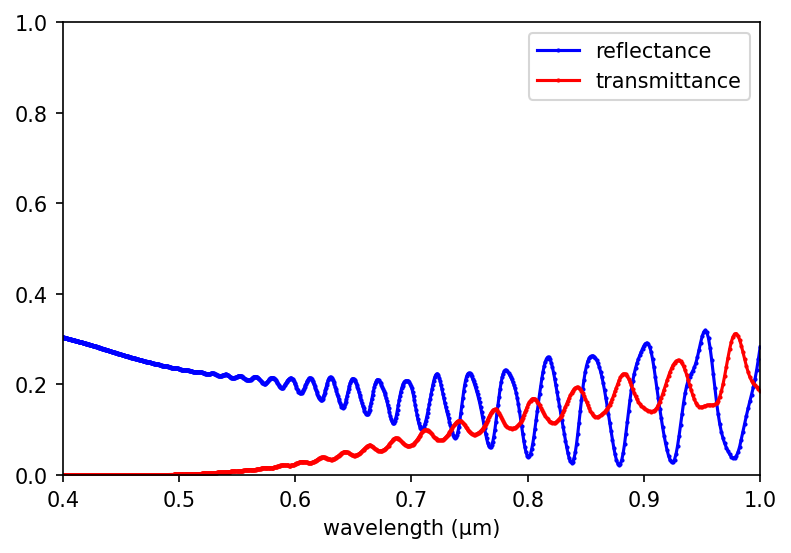

In [14]:
if mp.am_master():
    plt.figure(dpi=150)
    plt.plot(wl,Rs,'bo-',label='reflectance', markersize = 1)
    plt.plot(wl,Ts,'ro-',label='transmittance', markersize = 1)
    #plt.plot(wl,1-Rs-Ts,'go-',label='loss or Absorption', markersize = 1)
    plt.axis([.4, 1.0, 0, 1])
    plt.xlabel("wavelength (μm)")
    plt.legend(loc="upper right")
    plt.show()